# Árvore de Decisão com Python

**Importando pacotes necessários**

In [1]:
import warnings
warnings.filterwarnings("ignore")

% matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
colors = plt.rcParams['axes.color_cycle'][1], plt.rcParams['axes.color_cycle'][4]

import pandas

** Carregando dados, gerados localmente para o exemplo 'João joga tênis?' **

In [2]:
dataset = pandas.read_csv("./datasets/PlayTennis.csv")

In [3]:
dataset

,sample,target,humidity,windy,outlook,tired,tshirt,friends,went_out,temp
0,D0,yes,normal,yes,overcast,yes,red,yes,no,hot
1,D1,yes,high,no,overcast,yes,blue,yes,no,mild
2,D2,no,high,yes,overcast,yes,yellow,yes,yes,mild
3,D3,no,normal,yes,overcast,no,red,yes,no,cold
4,D4,yes,normal,yes,rainy,no,yellow,no,no,mild
5,D5,no,high,yes,sunny,no,yellow,yes,yes,mild
6,D6,no,normal,yes,rainy,yes,yellow,no,no,mild
7,D7,yes,high,no,sunny,yes,red,yes,yes,hot
8,D8,yes,high,yes,overcast,yes,yellow,yes,yes,mild
9,D9,yes,high,yes,overcast,no,yellow,yes,no,hot


**Transformando atributos categóricos**

In [4]:
categorical_cols = ['tshirt','temp','windy','tired','went_out','outlook','friends','humidity']
for column in categorical_cols:
    dataset[column] = pandas.factorize(dataset[column])[0]
dataset

,sample,target,humidity,windy,outlook,tired,tshirt,friends,went_out,temp
0,D0,yes,0,0,0,0,0,0,0,0
1,D1,yes,1,1,0,0,1,0,0,1
2,D2,no,1,0,0,0,2,0,1,1
3,D3,no,0,0,0,1,0,0,0,2
4,D4,yes,0,0,1,1,2,1,0,1
5,D5,no,1,0,2,1,2,0,1,1
6,D6,no,0,0,1,0,2,1,0,1
7,D7,yes,1,1,2,0,0,0,1,0
8,D8,yes,1,0,0,0,2,0,1,1
9,D9,yes,1,0,0,1,2,0,0,0


** Transformando alvo binário: **
- Se target é igual a **'yes'**, então será transformado para **+1**
- Se target é igual a **'no'**, então será transformado para **-1**

In [5]:
dataset['target'] = dataset['target'].replace('yes', 1)
dataset['target'] = dataset['target'].replace('no', -1)
dataset

,sample,target,humidity,windy,outlook,tired,tshirt,friends,went_out,temp
0,D0,1,0,0,0,0,0,0,0,0
1,D1,1,1,1,0,0,1,0,0,1
2,D2,-1,1,0,0,0,2,0,1,1
3,D3,-1,0,0,0,1,0,0,0,2
4,D4,1,0,0,1,1,2,1,0,1
5,D5,-1,1,0,2,1,2,0,1,1
6,D6,-1,0,0,1,0,2,1,0,1
7,D7,1,1,1,2,0,0,0,1,0
8,D8,1,1,0,0,0,2,0,1,1
9,D9,1,1,0,0,1,2,0,0,0


** Dividindo sub-conjunto de teste e treino **

In [6]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(dataset, train_size = 0.7)

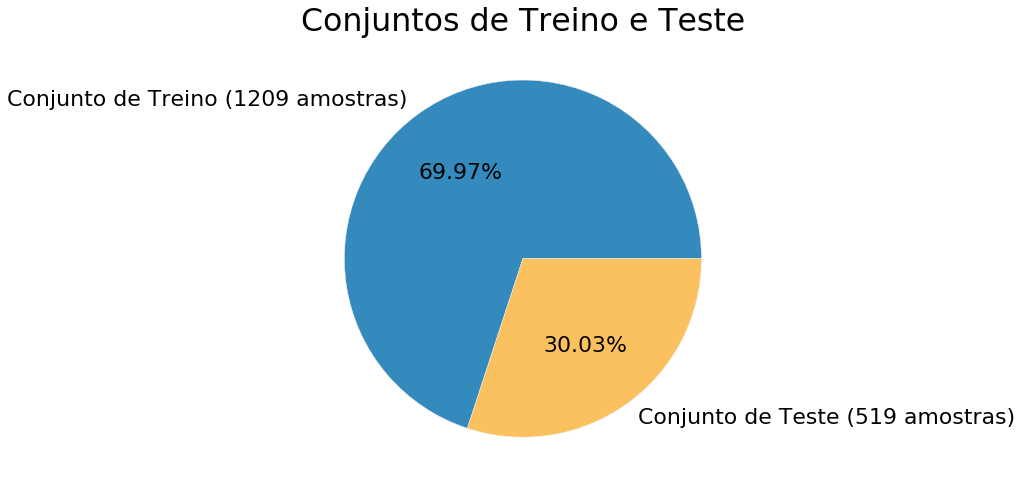

In [7]:
fig = plt.figure(figsize=(15, 8))
ax = fig.gca()
labels = ["Conjunto de Treino (%d amostras)" % len(train), "Conjunto de Teste (%d amostras)" % len(test)]
sizes = [len(train), len(test)]
plt.rcParams.update({'font.size': 22})
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%')
plt.title("Conjuntos de Treino e Teste")
ax.set_aspect('equal')

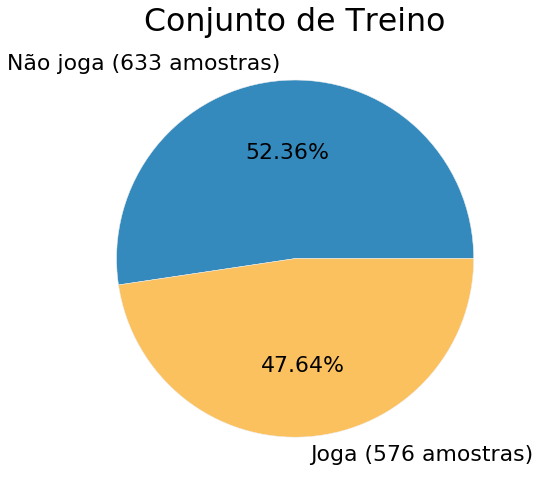

In [8]:
fig = plt.figure(figsize=(15, 8))
ax = fig.gca()
labels = ["Não joga (%d amostras)" % len(train[train.target < 0]), "Joga (%d amostras)" % len(train[train.target > 0])]
sizes = [len(train[train.target < 0]), len(train[train.target > 0])]
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%')
plt.title("Conjunto de Treino")
plt.rcParams.update({'font.size': 22})
ax.set_aspect('equal')

# Treinando árvore de decisão #

In [9]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt = DecisionTreeClassifier(max_depth=3)
#dt = DecisionTreeClassifier()
decision_tree_binary_classifier = dt.fit(train[categorical_cols], train.target)

** Graficando a árvore gerada **

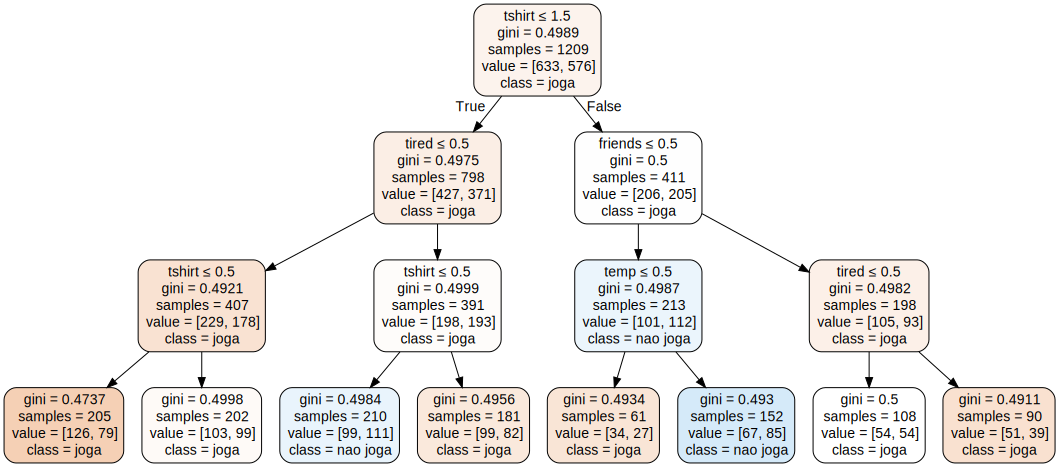

In [10]:
from IPython.display import SVG
import numpy as np
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
export_graphviz(
    decision_tree_binary_classifier,
    out_file=dot_data,  
    feature_names=np.array(categorical_cols),
    class_names=['joga', 'nao joga'],  
    filled=True,
    rounded=True,  
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
SVG(graph.create(format='svg'))

** Matriz de Confusão **

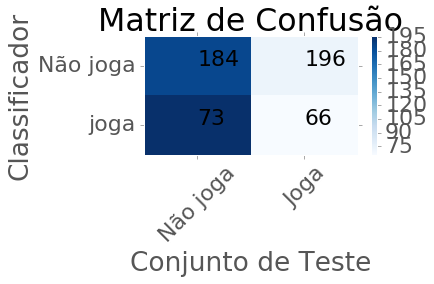

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
from reports.visualize import visualization
test_output = decision_tree_binary_classifier.predict(test[categorical_cols])
visualization.plot_confusion_matrix((confusion_matrix(test.target, test_output)))

** Desempenho do Classificador **

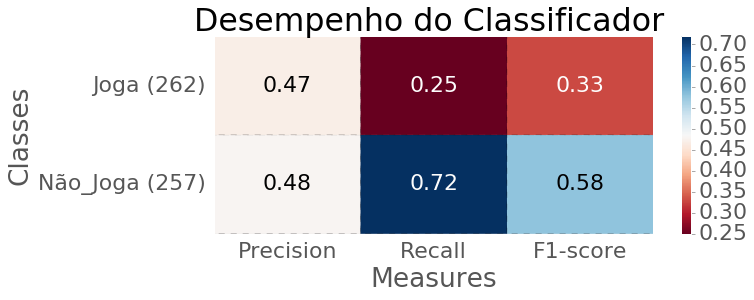

In [12]:
report = classification_report(
    test.target,
    test_output,
    target_names=["Não_Joga", "Joga"]
)
visualization().plot_classification_report(report)